In [1]:
import pristine_to_mock as ptm
import matplotlib
import matplotlib.pyplot as pyplot

## Step 0: convert to nJy and add metadata to header

In [2]:
ff='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.fits'
ffout='/Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits'
ptm.output_pristine_fits_image(ff,ffout)

## Inspect Step 0 output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'SimulatedImage', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')


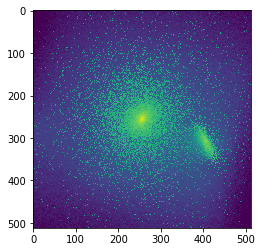

In [3]:
fo=fits.open(ffout)
fo.info()
print(fo['SimulatedImage'].header.cards)
pyplot.imshow(np.log10(fo['SimulatedImage'].data))

## Step 1a: convolve with simple PSF and inspect output

Filename: /Users/gsnyder/Dropbox/CCA2019/PipelineStuff/m0053.061.ACS_F814W.mocks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (512, 512)   float64   
  1  SimulatedImage    1 ImageHDU        11   (512, 512)   float64   
  2  MockImage_Noiseless    1 ImageHDU        16   (512, 512)   float64   
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -64, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 512, '')
('NAXIS2', 512, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockImage_Noiseless', '')
('BUNIT', 'nanojanskies', '')
('REDSHIFT', 0.49253732071, '')
('PIX_KPC', 0.390625, 'kpc')
('FWHMPIX', 4.584869643280763, 'pixels')
('FWHM', 0.3, 'arcsec')
('SIGMAPIX', 1.947014869758553, 'pixels')
('SIGMA', 0.1273982700432029, 'arcsec')
('PIXSIZE', 0.06543261277660473, 'arcsec')


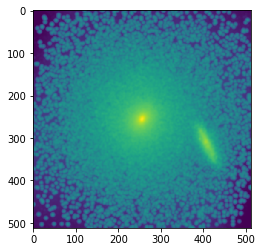

In [4]:
ptm.convolve_with_fwhm(ffout,fwhm_arcsec=0.3)
fo=fits.open(ffout)
fo.info()
print(fo['MockImage_Noiseless'].header.cards)
pyplot.imshow(np.log10(fo['MockImage_Noiseless'].data))

## Step 1b: add simple noise model (following Snyder+19)